# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [2]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm
import osmnx as ox

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'college'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [2]:
# Search for United Tribes Technical College
uttc_gdf = osm.features_from_address(
    'United Tribes Technical College, Bismarck, ND, United States',
    {'amenity': ['college']})
uttc_gdf

,,nodes,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,name,website,wikidata,geometry
element_type,osmid,,,,,,,,,,,
way,1157021269,"[10759584855, 10759584856, 10759584857, 450404...",Bismarck,3315,58504,ND,University Drive,college,United Tribes Technical College,https://uttc.edu/,Q7893617,"POLYGON ((-100.76305 46.76853, -100.76302 46.7..."


<Axes: >

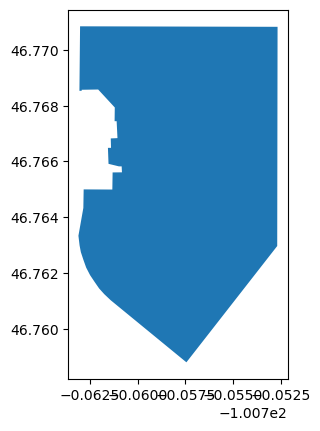

In [3]:
uttc_gdf.plot()

We have a map of the UTTC Campus!

> **Warning**
>
> The Open Street Maps (OSM) database is not always complete. For
> example, try searching for UTTC with the `{'building': True}`, and
> compare it to the [map of the UTTC campus on their
> website](https://uttc.edu/wp-content/uploads/2022/12/CAMPUS-MAP-2022-23.pdf).
> What do you notice?

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [4]:
# Plot UTTC boundary
uttc_map = uttc_gdf.hvplot(
    # Givethe map a descriptive title
    title="United Tribes Technical College, Bismarck, ND",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(uttc_map, 'uttc.html')

# Display the map
uttc_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [ ]:
# Pine Ridge, SD
reservation_name = 'Pine Ridge Indian Reservation'
tags = {'boundary':'aboriginal_lands', 'name':reservation_name}

pine_ridge_gdf = ox.features_from_place(reservation_name, tags)
pine_ridge_gdf

name  \
element_type osmid                                     
way          37513073                            NaN   
relation     9436075   Pine Ridge Indian Reservation   
             9436089      Rosebud Indian Reservation   

                                          name:en             name:lkt  \
element_type osmid                                                       
way          37513073                         NaN                  NaN   
relation     9436075                          NaN  Wazí Aháŋhaŋ Oyáŋke   
             9436089   Rosebud Indian Reservation                  NaN   

                       wikidata                         wikipedia  \
element_type osmid                                                  
way          37513073       NaN                               NaN   
relation     9436075   Q1929568  en:Pine Ridge Indian Reservation   
             9436089   Q3813702     en:Rosebud Indian Reservation   

                                                                geometry  \
element_type osmid                                                         
way          37513073  LINESTRING (-102.55670 42.99976, -102.55665 42...   
relation     9436075   POLYGON ((-103.00103 43.60589, -103.00072 43.6...   
             9436089   MULTIPOLYGON (((-98.93805 43.10052, -98.93779 ...   

                                                                   nodes  \
element_type osmid                                                         
way          37513073  [1778413396, 7589973973, 7589973974, 439107098...   
relation     9436075   [[[462229289, 158786182, 158786184, 158785615,...   
             9436089   [[[9505984790, 9505984789, 9505984788, 9505984...   

                      admin_level          boundary  \
element_type osmid                                    
way          37513073           8  aboriginal_lands   
relation     9436075          NaN  aboriginal_lands   
             9436089          NaN  aboriginal_lands   

                                                                  source  \
element_type osmid                                                         
way          37513073  TIGER/Line® 2008 Place Shapefiles (http://www....   
relation     9436075   https://www2.census.gov/geo/maps/DC2020/Tribal...   
             9436089                                                 NaN   

                                                                    ways  \
element_type osmid                                                         
way          37513073                                                NaN   
relation     9436075   [809716534, 1033447754, 37513073, 136109710, 1...   
             9436089   [1031408502, 1031408504, 1031408503, 103140850...   

                                  alt_name            operator      type  \
element_type osmid                                                         
way          37513073                  NaN                 NaN       NaN   
relation     9436075     Pine Ridge Agency  Oglala Sioux Tribe  boundary   
             9436089   Rosebud Reservation                 NaN  boundary   

                               alt_name:en  
element_type osmid                          
way          37513073                  NaN  
relation     9436075                   NaN  
             9436089   Rosebud Reservation

In [3]:
# Pine Ridge, SD
reservation_name = 'Pine Ridge Indian Reservation'
tags = {'boundary':'aboriginal_lands', 'name':reservation_name}

pine_ridge_gdf = ox.features_from_place(reservation_name, tags)
pine_ridge_gdf

name  \
element_type osmid                                     
way          37513073                            NaN   
relation     9436075   Pine Ridge Indian Reservation   
             9436089      Rosebud Indian Reservation   

                                          name:en             name:lkt  \
element_type osmid                                                       
way          37513073                         NaN                  NaN   
relation     9436075                          NaN  Wazí Aháŋhaŋ Oyáŋke   
             9436089   Rosebud Indian Reservation                  NaN   

                       wikidata                         wikipedia  \
element_type osmid                                                  
way          37513073       NaN                               NaN   
relation     9436075   Q1929568  en:Pine Ridge Indian Reservation   
             9436089   Q3813702     en:Rosebud Indian Reservation   

                                                                geometry  \
element_type osmid                                                         
way          37513073  LINESTRING (-102.55670 42.99976, -102.55665 42...   
relation     9436075   POLYGON ((-103.00103 43.60589, -103.00072 43.6...   
             9436089   MULTIPOLYGON (((-98.93805 43.10052, -98.93779 ...   

                                                                   nodes  \
element_type osmid                                                         
way          37513073  [1778413396, 7589973973, 7589973974, 439107098...   
relation     9436075   [[[462229289, 158786182, 158786184, 158785615,...   
             9436089   [[[9505984790, 9505984789, 9505984788, 9505984...   

                      admin_level          boundary  \
element_type osmid                                    
way          37513073           8  aboriginal_lands   
relation     9436075          NaN  aboriginal_lands   
             9436089          NaN  aboriginal_lands   

                                                                  source  \
element_type osmid                                                         
way          37513073  TIGER/Line® 2008 Place Shapefiles (http://www....   
relation     9436075   https://www2.census.gov/geo/maps/DC2020/Tribal...   
             9436089                                                 NaN   

                                                                    ways  \
element_type osmid                                                         
way          37513073                                                NaN   
relation     9436075   [809716534, 1033447754, 37513073, 136109710, 1...   
             9436089   [1031408502, 1031408504, 1031408503, 103140850...   

                                  alt_name            operator      type  \
element_type osmid                                                         
way          37513073                  NaN                 NaN       NaN   
relation     9436075     Pine Ridge Agency  Oglala Sioux Tribe  boundary   
             9436089   Rosebud Reservation                 NaN  boundary   

                               alt_name:en  
element_type osmid                          
way          37513073                  NaN  
relation     9436075                   NaN  
             9436089   Rosebud Reservation

In [4]:
# Pine Ridge, SD
reservation_name = 'Rosebud Indian Reservation'
tags = {'boundary':'aboriginal_lands', 'name':reservation_name}

rosebud_gdf = ox.features_from_place(reservation_name, tags)
rosebud_gdf

name  \
element_type osmid                                    
relation     9436089     Rosebud Indian Reservation   
             9436075  Pine Ridge Indian Reservation   

                                         name:en             name:lkt  \
element_type osmid                                                      
relation     9436089  Rosebud Indian Reservation                  NaN   
             9436075                         NaN  Wazí Aháŋhaŋ Oyáŋke   

                      wikidata                         wikipedia  \
element_type osmid                                                 
relation     9436089  Q3813702     en:Rosebud Indian Reservation   
             9436075  Q1929568  en:Pine Ridge Indian Reservation   

                                                               geometry  \
element_type osmid                                                        
relation     9436089  MULTIPOLYGON (((-98.93805 43.10052, -98.93779 ...   
             9436075  POLYGON ((-103.00103 43.60589, -103.00072 43.6...   

                                                                  nodes  \
element_type osmid                                                        
relation     9436089  [[[9505984790, 9505984789, 9505984788, 9505984...   
             9436075  [[[462229289, 158786182, 158786184, 158785615,...   

                              boundary  \
element_type osmid                       
relation     9436089  aboriginal_lands   
             9436075  aboriginal_lands   

                                                                 source  \
element_type osmid                                                        
relation     9436089                                                NaN   
             9436075  https://www2.census.gov/geo/maps/DC2020/Tribal...   

                                                                   ways  \
element_type osmid                                                        
relation     9436089  [1031408502, 1031408504, 1031408503, 103140850...   
             9436075  [809716534, 1033447754, 37513073, 136109710, 1...   

                                 alt_name          alt_name:en      type  \
element_type osmid                                                         
relation     9436089  Rosebud Reservation  Rosebud Reservation  boundary   
             9436075    Pine Ridge Agency                  NaN  boundary   

                                operator  
element_type osmid                        
relation     9436089                 NaN  
             9436075  Oglala Sioux Tribe

In [5]:
# Select out Wazí Aháŋhaŋ Oyáŋke
rosebud_boundary = rosebud_gdf[rosebud_gdf["name"]=="Rosebud Indian Reservation"]
rosebud_boundary

,,name,name:en,name:lkt,wikidata,wikipedia,geometry,nodes,boundary,source,ways,alt_name,alt_name:en,type,operator
element_type,osmid,,,,,,,,,,,,,,
relation,9436089,Rosebud Indian Reservation,Rosebud Indian Reservation,NaN,Q3813702,en:Rosebud Indian Reservation,"MULTIPOLYGON (((-98.93805 43.10052, -98.93779 ...","[[[9505984790, 9505984789, 9505984788, 9505984...",aboriginal_lands,NaN,"[1031408502, 1031408504, 1031408503, 103140850...",Rosebud Reservation,Rosebud Reservation,boundary,NaN


In [6]:
rosebud_boundary.explore()

In [7]:
# Plot rosebud boundary
rosebud_map = rosebud_gdf.hvplot(
    # Givethe map a descriptive title
    title="Rosebud Indian Reservation rosebud, SD",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(rosebud_map, 'rosebud.html')

# Display the map
rosebud_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]